In [12]:
import matplotlib.pyplot as plt
import numpy as np
from random import seed
from random import randint
from pandas import DataFrame, read_csv, to_numeric, concat
from sklearn import cluster
import math
seed(1)

In [13]:
optDigitsTes = open('optdigits.tra', "r")
optDigitsTes2 = open('optdigits.tes', "r")

def readInstances(file):
    dataInstance =[]
    index = -1
    for i in file:
        index += 1
        dataInstance.append([])
        instance = i
        value = ""
        for j in instance:
            if j != ",":
                value += j
            else:
                if value != "":
                    dataInstance[index].append(int(value))
                value = ""
        if value != "":        
            dataInstance[index].append(int(value))
    return dataInstance[:-1]

def makeColumns(data):
    dataInstanceVar =[]    
    for j in range(len(data[0])):
        dataInstanceVar.append([])
        for i in range(len(data)):
            dataInstanceVar[j].append(data[i][j])
    return [dataInstanceVar[:-1], dataInstanceVar[len(dataInstanceVar)-1]]

def makeClassSubInstances(data):
    classInstances = []
    numberClasses = 10
    for i in range(numberClasses):
        classInstances.append([])
    for i in range(len(data)):
        index = data[i][len(data[i]) - 1]
        classInstances[index].append(data[i])
    return classInstances    
        
instances = readInstances(optDigitsTes)    
instances2 = readInstances(optDigitsTes2) 

NUMBER 1, Kmeans cluster algorithm, it takes a while to run. Here is the data I got for a prior run. <br>
Needs the first two cells to run. You do not have to run the below cell (for number one) to make other cells work.<br>
<br>
Test 0<br>
reconstruction error, 10 clusters (train): <br>
2628644.92<br>
reconstruction error, 10 clusters (test): <br>
1284392.59<br>
<br>
reconstruction error, 20 clusters (train): <br>
2026316.38<br>
reconstruction error, 20 clusters (test): <br>
1024630.94<br>
Test 1<br>
reconstruction error, 10 clusters (train): <br>
2586601.52<br>
reconstruction error, 10 clusters (test): <br>
1255924.07<br>
Test 1<br>
reconstruction error, 20 clusters (train): <br>
2114981.18<br>
reconstruction error, 20 clusters (test): <br>
1064993.08<br>
Test 2<br>
reconstruction error, 10 clusters (train): <br>
2606843.98<br>
reconstruction error, 10 clusters (test): <br>
1267692.51<br>
Test 2<br>
reconstruction error, 20 clusters (train): <br>
2109764.56<br>
reconstruction error, 20 clusters (test):<br> 
1072548.94<br>
Test 3<br>
reconstruction error, 10 clusters (train): <br>
2625722.3<br>
reconstruction error, 10 clusters (test): <br>
1289911.1<br>
Test 3<br>
reconstruction error, 20 clusters (train): <br>
2088907.12<br>
reconstruction error, 20 clusters (test): <br>
1053124.23<br>
Test 4<br>
reconstruction error, 10 clusters (train): <br>
2695341.28<br>
reconstruction error, 10 clusters (test): <br>
1326125.32<br>
Test 4<br>
reconstruction error, 20 clusters (train): <br>
2102875.79<br>
reconstruction error, 20 clusters (test): <br>
1046748.56<br>
Test 5<br>
reconstruction error, 10 clusters (train): <br>
2554856.74<br>
reconstruction error, 10 clusters (test): <br>
1234691.84<br>
Test 5<br>
reconstruction error, 20 clusters (train): <br>
2073946.74<br>
reconstruction error, 20 clusters (test): <br>
1067100.55<br>
Test 6<br>
reconstruction error, 10 clusters (train): <br>
2574736.49<br>
reconstruction error, 10 clusters (test): <br>
1267543.13<br>
Test 6<br>
reconstruction error, 20 clusters (train): <br>
2168148.04<br>
reconstruction error, 20 clusters (test): <br>
1072554.82<br>
Test 7<br>
reconstruction error, 10 clusters (train): <br>
2652494.17<br>
reconstruction error, 10 clusters (test): <br>
1313857.62<br>
Test 7<br>
reconstruction error, 20 clusters (train): <br>
2117661.46<br>
reconstruction error, 20 clusters (test): <br>
1053546.6<br>
Test 8<br>
reconstruction error, 10 clusters (train): <br>
2680573.76<br>
reconstruction error, 10 clusters (test): <br>
1310152.06<br>
Test 8<br>
reconstruction error, 20 clusters (train): <br>
2067198.18<br>
reconstruction error, 20 clusters (test): <br>
1046136.97<br>
Test 9<br>
reconstruction error, 10 clusters (train): <br>
2739464.75<br>
reconstruction error, 10 clusters (test): <br>
1339977.35<br>
Test 9<br>
reconstruction error, 20 clusters (train): <br>
2145890.89<br>
reconstruction error, 20 clusters (test): <br>
1072887.8<br>

In [14]:
# NUMBER 1 K means cluster algorithm

def kMeanCluster(clusters,data):
    prev_means = randomClusterStart(clusters,data)
    new_means = 0
    convergenceTest = 1000
    while convergenceTest > 200:
        new_means = newMeans(clusters,data,prev_means)
        convergenceTest = testConvergence(prev_means,new_means)
        prev_means = new_means
        
    temp = []
    for i in range(len(new_means)):
        temp.append(new_means[i][:-1])
    return temp

def testConvergence(prev,curr):
    clusters = len(prev)
    diff = 0
    for i in range(clusters):
        diff += distanceCalculator(prev[i],curr[i])
    return diff

# selects 10 random points    
def randomClusterStart(clusters,data):
    randMeans = []
    randValues = []
    i = 0
    while clusters > len(randValues):
        found = False
        val = randint(0,len(data))
        for j in range(i):
            if val == randValues[j]:
                found = True
                break;
        if not(found):
            i += 1
#            data[val][len(data[val]) - 1] = 0
            randValues.append(val)
            randMeans.append(data[val])
    return randMeans

def copyMeans(prev_means):
    copyMeans = []
    for i in range(len(prev_means)):
        copyMeans.append([])
        for j in range(len(prev_means[i]) - 1):
            copyMeans[i].append(prev_means[i][j])
        copyMeans[i].append(0)
    return copyMeans

def newMeans(clusters,data,prev_means):
    new_means = copyMeans(prev_means)
    variables = len(new_means[0]) - 1
    
    for i in range(len(data)):
        shortestDistance = 100000
        index = 0
        for j in range(clusters):
            distance = distanceCalculator(data[i],prev_means[j])
            if distance <= shortestDistance:
                shortestDistance = distance
                index = j
        if new_means[index][variables] != 0:
            for k in range(variables):
                new_means[index][k] += data[i][k]
        else:
            for k in range(variables):
                new_means[index][k] = data[i][k]                
        new_means[index][variables] += 1
    
    for i in range(clusters):
        for j in range(variables):
            if new_means[i][variables] > 0:
                new_means[i][j] = round((float(new_means[i][j])/new_means[i][variables]), 3)
    
    return new_means
                
            
def distanceCalculator(val,mean):
    distance = 0
    for i in range(len(val) - 1):
        distance += (val[i] - mean[i])**2
    return round(distance, 3)

            
def reconstructionError(clusterMeans,data):
    numInstances = len(data)
    numClusters = (len(clusterMeans))
    totalError = 0
    for i in range(numInstances):
        smallestDist = -1
        for j in range(numClusters):
            tempDist = distanceCalculator(data[i],clusterMeans[j])
            if smallestDist == -1 or tempDist <= smallestDist:
                smallestDist = tempDist
        totalError += smallestDist
    return round(totalError,2)
        
def doTest(numTests):
    for i in range(numTests):
        test = kMeanCluster(10,instances)
        print("Test " + str(i))
        print("reconstruction error, 10 clusters (train): ")
        print(reconstructionError(test,instances))
        print("reconstruction error, 10 clusters (test): ")
        print(reconstructionError(test,instances2))
        test2 = kMeanCluster(20,instances)
        print("Test " + str(i))
        print("reconstruction error, 20 clusters (train): ")
        print(reconstructionError(test2,instances))
        print("reconstruction error, 20 clusters (test): ")
        print(reconstructionError(test2,instances2))          
        
doTest(10)

Test 0
reconstruction error, 10 clusters (train): 
2629458.18
reconstruction error, 10 clusters (test): 
1282867.81
Test 0
reconstruction error, 20 clusters (train): 
2103503.55
reconstruction error, 20 clusters (test): 
1056244.03
Test 1
reconstruction error, 10 clusters (train): 
2580127.93
reconstruction error, 10 clusters (test): 
1269482.14
Test 1
reconstruction error, 20 clusters (train): 
2071768.75
reconstruction error, 20 clusters (test): 
1039627.94
Test 2
reconstruction error, 10 clusters (train): 
2636397.45
reconstruction error, 10 clusters (test): 
1284845.16
Test 2
reconstruction error, 20 clusters (train): 
2067973.83
reconstruction error, 20 clusters (test): 
1060511.84
Test 3
reconstruction error, 10 clusters (train): 
2661669.36
reconstruction error, 10 clusters (test): 
1299273.76
Test 3
reconstruction error, 20 clusters (train): 
2137325.25
reconstruction error, 20 clusters (test): 
1070582.15
Test 4
reconstruction error, 10 clusters (train): 
2629981.48
reconstruc

Number 2 (requires first two cells to run), displays the graph upon compilation

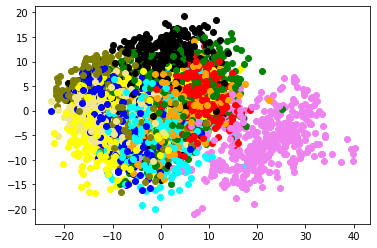

In [3]:
# Number 2
deletedCol = []

def meanVariables(data):
    numVariables = len(data[0]) - 1 # because i made bad decisions
    numInstances = len(data)
    meanArray = []
    for i in range(numVariables):
        mean = 0
        for j in range(numInstances):
            mean += data[j][i]
        meanArray.append(round(float(mean)/numInstances,3))
    return meanArray

def covarianceMatrix(dataCol,means):
    numCovariances = len(means)
    numData = len(dataCol[0])
    covariance_matrix = []    
    for i in range(numCovariances):
        covariance_matrix.append([])
        for j in range(numCovariances):
            covariance_matrix[i].append(0)
    i = 0
    while i < numCovariances:
        rowCov = 0 # used to determine covariance of a variable to delete or not
        j = 0
        while j < ((numCovariances/2)+1):
            k = 0           
            while k < numData:
                result = round(((dataCol[i][k] - means[i])*(dataCol[j][k] - means[j]))/numData,5)
                rowCov += abs(result)
                covariance_matrix[i][j] = result
                covariance_matrix[j][i] = result
                k += 1
            j += 1
        if rowCov < 10:
            deletedCol.append(i)
            del dataCol[i:i+1]
            del means[i:i+1]
            del covariance_matrix[i:i+1]

            for t in range(len(covariance_matrix)):
                del covariance_matrix[t][i:i+1]
            numCovariances = numCovariances - 1
        else:
            i += 1
                
    return covariance_matrix

def balanceInstances(means,dataCol):
    numData = len(dataCol[0])
    numVariables = len(dataCol)
    balanceData = []
    for i in range(numVariables):
        balanceData.append([])
        for j in range(numData):
            balanceData[i].append(dataCol[i][j] - means[i])
    return balanceData
    
instanceColumns,classes = makeColumns(instances)
variableMeans = meanVariables(instances)

covMatrix = covarianceMatrix(instanceColumns,variableMeans)
def getPDAeigenVectors(covMat,numVectors):
    eigenValues,eigenVectors = np.linalg.eig(covMat)
    eigenVec = np.matrix(eigenVectors[:,0:numVectors]).T
    return eigenVec
 
balancedInstance = balanceInstances(variableMeans,instanceColumns)   

def getPDATestValues(eigenVec,bInstances):    
    Z = eigenVec.dot(bInstances)
    return Z

dataVar = getPDATestValues(getPDAeigenVectors(covMatrix,2),balancedInstance)
    

answers = np.matrix(classes)
theGraph = np.concatenate((dataVar,answers))
theGraph = np.array(theGraph)

colors = ["red","yellow","orange","blue","green","black","violet","khaki","cyan","olive"]

for i in range(len(theGraph[2])): # plots according to class Data
    plt.plot(theGraph[0][i],theGraph[1][i],'o',color=colors[int(theGraph[2][i])])
    
plt.show()    


Number 3 (requires first two cells to run and number 2 to be compiled), displays the graph upon compilation

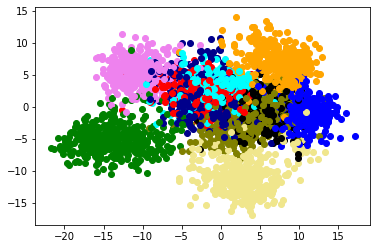

In [4]:
# NUMBER 3
def classColumnData(dataCol,classData):
    numClasses = 10
    numData = len(dataCol[0])
    numVariables = len(dataCol)
    classCol = []
    for i in range(numClasses):
        classCol.append([])
        for j in range(numVariables):
            classCol[i].append([])
            
    for i in range(numData):
        index = classData[i]
        for j in range(numVariables):
#            print(dataCol[j][i])
            classCol[index][j].append(dataCol[j][i])
            
    return classCol

def makeClassMeans(dataClassCol):
    numClasses = len(dataClassCol)
    numVariables = len(dataClassCol[0])
    meanArray = []
    ammountPerClass = []
    for i in range(numClasses):
        meanArray.append([])
        for j in range(numVariables):
            total = 0
            numData = 0
            for k in range(len(dataClassCol[i][j])):
                total+=dataClassCol[i][j][k]
                numData += 1
            meanArray[i].append(round(float(total)/numData,5))
        ammountPerClass.append(numData)
    return meanArray,ammountPerClass

def findTotalMeans(classMeans):
    numberClasses = 10
    theMeans = []
    for i in range(len(classMeans[0])):
        theMeans.append(0)
        for j in range(len(classMeans)):
            theMeans[i] += classMeans[j][i]
        theMeans[i] = theMeans[i]/numberClasses
    return theMeans
                
def betweenClassScatter(means,ammountPerClass,totalMeans):
    numClasses = 10
    
    m = np.matrix(totalMeans)    
    SB = ((np.matrix(means[0])-m).T).dot(np.matrix(means[0])-m)
    test = ammountPerClass[0]*SB
    for i in range(1,numClasses):
        temp1 = np.matrix(means[i])
        temp1 = ammountPerClass[i]*((temp1 - m).T).dot(temp1 - m)
        SB = SB + temp1
        
    return SB
        
def withinClassScatter(meansClass,dataClassCol):
    numClasses = 10
    numVariables = len(dataClassCol[0])
    SW = []
    for i in range(10):
        varianceVector = []        
        for k in range(len(dataClassCol[i][0])):
            varianceVector = [] 
            for j in range(numVariables):
                varianceVector.append(0)                
                varianceVector[j] += dataClassCol[i][j][k] - meansClass[i][j]
            if len(SW) == 0:
                xminusMVec = np.matrix(varianceVector)
                SW = (xminusMVec.T).dot(xminusMVec)
            else:
                xminusMVec = np.matrix(varianceVector)
                SWi = (xminusMVec.T).dot(xminusMVec)
                SW = SW + SWi
                
    return SW
                

classColData = classColumnData(instanceColumns,classes)
meanColData,numPerClass = makeClassMeans(classColData)
totMeans = findTotalMeans(meanColData)
SB = betweenClassScatter(meanColData,numPerClass,totMeans)
SW = withinClassScatter(meanColData,classColData)

def getEigenVectorsLDA(SB,SW,numVectors):
    SWinverse = np.linalg.inv(SW)
    LDA = SWinverse.dot(SB)
    eigenValues2,eigenVectors2 = np.linalg.eig(LDA)
    eigenVectors2 = eigenVectors2.real
    return eigenVectors2[:,0:numVectors].T


def getMinimizedVariablesLDA(eigenVectors,balancedValues):
    return eigenVectors.dot(balancedValues)

eigenVec2 = getEigenVectorsLDA(SB,SW,2)
    


Z = getMinimizedVariablesLDA(eigenVec2,balancedInstance)

theGraph2 = np.concatenate((Z,answers))
# print((covMat.dot(eigenVec1) - (eigenVal1*eigenVec1)).round(5)) test
theGraph2 = np.array(theGraph2)

colors = ["red","darkblue","orange","blue","green","black","violet","khaki","cyan","olive"]
#plt.plot(theGraph[0][0],theGraph[1][0],'o')
#plt.plot(theGraph[0][1],theGraph[1][1],'o',color="red")

for i in range(len(theGraph2[2])): # plots according to class Data
    plt.plot(theGraph2[0][i].real,theGraph2[1][i].real,'o',color=colors[int(theGraph2[2][i])])
    
plt.show() 


Number 4 (requires prior cells, except cell for number 1)

In [5]:
# NUmber 4
from sklearn.neighbors import KNeighborsClassifier

def makeHeader(values):
    theList = []
    for i in range(values+1):
        theList.append(str(i))
    return theList

data = read_csv('optdigits.tra', sep=",",names=makeHeader(64))
data2 = read_csv('optdigits.tes',sep=",",names = makeHeader(64))

features = data[makeHeader(63)]
outcome = data['64']
featureTest = data2[makeHeader(63)]
outcome2 = data2['64']
kneighbors3 = KNeighborsClassifier(n_neighbors=3)  
kneighbors5 = KNeighborsClassifier(n_neighbors=5)  
kneighbors15 = KNeighborsClassifier(n_neighbors=15)  
result2 = kneighbors15.fit(features,outcome).predict(featureTest)
result4 = kneighbors5.fit(features,outcome).predict(featureTest)
result6 = kneighbors3.fit(features,outcome).predict(featureTest)

def makeConfusionMatrix(prediction,actual,classes):
    confusionMatrix = []
    for i in range(classes):
        confusionMatrix.append([])
        for j in range(classes):
            confusionMatrix[i].append(0)
    
    for i in range(len(prediction)):
        confusionMatrix[prediction[i]][actual[i]] += 1
    
    return confusionMatrix

def printConfusionMatrix(confusionMat,classes):
    print("             ACTUAL   ")
    
    word = "predicted"
    print("   ", end="")
    for i in range(classes):
        print(" ",end="")
        print(i, end="    ")
    print()
    for i in range(classes):
        if i < len(word):
            print(word[i], end= " ")
        else:
            print("  ", end="")
        print(i, end=" ")
        for j in range(classes):
            value = str(confusionMat[i][j])
            print(value, end="")
            numSpaces = 6 - len(value)
            for k in range(numSpaces):
                print(" ",end="")
        print()
            
def testErrorClass(prediction,actual,classes):
    classRightWrong = []
    classAccuracy= []
    for i in range(classes):
        classRightWrong.append([])
        classRightWrong[i].append(0)
        classRightWrong[i].append(0)
        
    for i in range(len(prediction)):
        if prediction[i] == actual[i]:
            classRightWrong[actual[i]][0] += 1
        else:
            classRightWrong[actual[i]][1] += 1
            
    for i in range(classes):
        classAccuracy.append(classRightWrong[i][1]/(classRightWrong[i][0] + classRightWrong[i][1]))
        
    return classAccuracy

def displayError(dError):
    print("Error results (percentage)")
    for i in range(len(dError)):
        print("Class " + str(i) + " error: ", end="")
        print(round(dError[i]*100,3),end="")
        print(" %")

print("K nearest Neigbor where k=15")        
confusionMat = makeConfusionMatrix(result2,outcome2,10)
printConfusionMatrix(confusionMat,10)


theError = testErrorClass(result2,outcome2,10)
displayError(theError)
print()
print("K nearest Neigbor where k=5")        
confusionMat2 = makeConfusionMatrix(result4,outcome2,10)
printConfusionMatrix(confusionMat2,10)


theError2 = testErrorClass(result4,outcome2,10)
displayError(theError2)
print()
print("K nearest Neigbor where k=3")        
confusionMat3 = makeConfusionMatrix(result6,outcome2,10)
printConfusionMatrix(confusionMat3,10)


theError3 = testErrorClass(result6,outcome2,10)
displayError(theError3)

K nearest Neigbor where k=15
             ACTUAL   
    0     1     2     3     4     5     6     7     8     9    
p 0 178   0     0     0     0     0     0     0     0     0     
r 1 0     181   3     1     1     0     0     0     10    2     
e 2 0     0     172   0     0     0     0     0     0     0     
d 3 0     0     0     176   0     0     0     0     2     2     
i 4 0     0     0     0     179   1     0     0     0     0     
c 5 0     0     0     1     0     178   1     0     1     3     
t 6 0     1     0     0     0     1     180   0     0     0     
e 7 0     0     2     2     0     0     0     174   0     0     
d 8 0     0     0     3     1     0     0     1     159   2     
  9 0     0     0     0     0     2     0     4     2     171   
Error results (percentage)
Class 0 error: 0.0 %
Class 1 error: 0.549 %
Class 2 error: 2.825 %
Class 3 error: 3.825 %
Class 4 error: 1.105 %
Class 5 error: 2.198 %
Class 6 error: 0.552 %
Class 7 error: 2.793 %
Class 8 error: 8.621 %
Cl

Number 5

In [10]:
# Number 5
instanceColumns2,classes2 = makeColumns(instances2)
variableMeans2 = meanVariables(instances2)
balancedInstance2 = balanceInstances(variableMeans2,instanceColumns2)
# needs number 2 to run
def removeBadCol(dataCol):
    for i in range(len(deletedCol)):
        index = deletedCol[i]
        del dataCol[index:index+1]
    return dataCol

balancedInstance2 = removeBadCol(balancedInstance2)

pdaEigen9 = getPDAeigenVectors(covMatrix,9)
fP9 = getPDATestValues(pdaEigen9,balancedInstance)
fTP9 = getPDATestValues(pdaEigen9,balancedInstance2)

featuresPDA9 = np.array(fP9.T)
featuresTestPDA9 = np.array(fTP9.T) 

pdaEigen5 = getPDAeigenVectors(covMatrix,5)
fP5 = getPDATestValues(pdaEigen5,balancedInstance)
fTP5 = getPDATestValues(pdaEigen5,balancedInstance2)

featuresPDA5 = np.array(fP5.T)
featuresTestPDA5 = np.array(fTP5.T) 

pdaEigen2 = getPDAeigenVectors(covMatrix,2)
fP2 = getPDATestValues(pdaEigen5,balancedInstance)
fTP2 = getPDATestValues(pdaEigen5,balancedInstance2)

featuresPDA2 = np.array(fP2.T)
featuresTestPDA2 = np.array(fTP2.T) 
print("5A) PDA")
print()
print("K nearest Neigbor where k=15 and 9 eigen values")

result10 = kneighbors15.fit(featuresPDA9,outcome[:-1]).predict(featuresTestPDA9)
theError10 = testErrorClass(result10,outcome2,10)
displayError(theError10)

        
confusionMat10 = makeConfusionMatrix(result10,outcome2,10)
printConfusionMatrix(confusionMat10,10)

print()
print("K nearest Neigbor where k=5 and 9 eigen values")

result10 = kneighbors5.fit(featuresPDA9,outcome[:-1]).predict(featuresTestPDA9)
theError10 = testErrorClass(result10,outcome2,10)
displayError(theError10)

        
confusionMat10 = makeConfusionMatrix(result10,outcome2,10)
printConfusionMatrix(confusionMat10,10)

print()
print("K nearest Neigbor where k=3 and 9 eigen values")

result10 = kneighbors3.fit(featuresPDA9,outcome[:-1]).predict(featuresTestPDA9)
theError10 = testErrorClass(result10,outcome2,10)
displayError(theError10)

        
confusionMat10 = makeConfusionMatrix(result10,outcome2,10)
printConfusionMatrix(confusionMat10,10)

print()
print()
print("K nearest Neigbor where k=15 and 5 eigen values")

result11 = kneighbors15.fit(featuresPDA5,outcome[:-1]).predict(featuresTestPDA5)
theError11 = testErrorClass(result11,outcome2,10)
displayError(theError11)

        
confusionMat11 = makeConfusionMatrix(result11,outcome2,10)
printConfusionMatrix(confusionMat11,10)

print()
print("K nearest Neigbor where k=5 and 5 eigen values")

result11 = kneighbors5.fit(featuresPDA5,outcome[:-1]).predict(featuresTestPDA5)
theError11 = testErrorClass(result11,outcome2,10)
displayError(theError11)

        
confusionMat11 = makeConfusionMatrix(result11,outcome2,10)
printConfusionMatrix(confusionMat11,10)

print()
print("K nearest Neigbor where k=3 and 5 eigen values")

result11 = kneighbors3.fit(featuresPDA5,outcome[:-1]).predict(featuresTestPDA5)
theError11 = testErrorClass(result11,outcome2,10)
displayError(theError11)

        
confusionMat11 = makeConfusionMatrix(result11,outcome2,10)
printConfusionMatrix(confusionMat11,10)
print()
print()
print("K nearest Neigbor where k=15 and 2 eigen values")

result11 = kneighbors15.fit(featuresPDA5,outcome[:-1]).predict(featuresTestPDA2)
theError11 = testErrorClass(result11,outcome2,10)
displayError(theError11)

        
confusionMat11 = makeConfusionMatrix(result11,outcome2,10)
printConfusionMatrix(confusionMat11,10)

print()
print("K nearest Neigbor where k=5 and 2 eigen values")

result11 = kneighbors5.fit(featuresPDA5,outcome[:-1]).predict(featuresTestPDA2)
theError11 = testErrorClass(result11,outcome2,10)
displayError(theError11)

        
confusionMat11 = makeConfusionMatrix(result11,outcome2,10)
printConfusionMatrix(confusionMat11,10)

print()
print("K nearest Neigbor where k=3 and 2 eigen values")

result11 = kneighbors3.fit(featuresPDA5,outcome[:-1]).predict(featuresTestPDA2)
theError11 = testErrorClass(result11,outcome2,10)
displayError(theError11)

        
confusionMat11 = makeConfusionMatrix(result11,outcome2,10)
printConfusionMatrix(confusionMat11,10)

5A) PDA

K nearest Neigbor where k=15 and 9 eigen values
Error results (percentage)
Class 0 error: 0.562 %
Class 1 error: 22.527 %
Class 2 error: 10.734 %
Class 3 error: 30.601 %
Class 4 error: 4.972 %
Class 5 error: 8.242 %
Class 6 error: 9.945 %
Class 7 error: 18.436 %
Class 8 error: 32.948 %
Class 9 error: 27.778 %
             ACTUAL   
    0     1     2     3     4     5     6     7     8     9    
p 0 177   0     1     0     3     1     4     0     0     0     
r 1 0     141   5     17    1     0     3     10    36    9     
e 2 0     13    158   6     0     0     0     0     1     3     
d 3 0     10    2     127   0     2     0     3     5     27    
i 4 1     0     0     1     172   4     0     3     0     1     
c 5 0     1     0     1     3     167   0     0     4     5     
t 6 0     0     0     0     0     0     163   0     1     0     
e 7 0     4     1     4     2     0     0     146   3     4     
d 8 0     13    8     8     0     0     11    3     116   1     
  9 0   

5B) must compile above cell

In [9]:
print()
print("Number 5b LDA")


eigenVec5 = getEigenVectorsLDA(SB,SW,5)# calculated from before  
eigenVec9 = getEigenVectorsLDA(SB,SW,9)# calculated from before 
eigenVec2 = getEigenVectorsLDA(SB,SW,2)# calculated from before 
print()
print("K nearest Neigbor where k=15 and 5 eigen values (LDA)")
Z5 = getMinimizedVariablesLDA(eigenVec5,balancedInstance)
Z6 = getMinimizedVariablesLDA(eigenVec5,balancedInstance2)


LDAFeatures5 = np.array(Z5.T)
featuresTest5 = np.array(Z6.T)


result3 = kneighbors15.fit(LDAFeatures5,outcome[:-1]).predict(featuresTest5)
theError = testErrorClass(result3,outcome2,10)
displayError(theError)
confusionMat11 = makeConfusionMatrix(result3,outcome2,10)
printConfusionMatrix(confusionMat11,10)
print()
print("K nearest Neigbor where k=15 and 9 eigen values (LDA)")
Z5 = getMinimizedVariablesLDA(eigenVec9,balancedInstance)
Z6 = getMinimizedVariablesLDA(eigenVec9,balancedInstance2)


LDAFeatures5 = np.array(Z5.T)
featuresTest5 = np.array(Z6.T)


result3 = kneighbors15.fit(LDAFeatures5,outcome[:-1]).predict(featuresTest5)
theError = testErrorClass(result3,outcome2,10)
displayError(theError)
confusionMat11 = makeConfusionMatrix(result3,outcome2,10)
printConfusionMatrix(confusionMat11,10)
print()
print("K nearest Neigbor where k=15 and 2 eigen values (LDA)")
Z5 = getMinimizedVariablesLDA(eigenVec2,balancedInstance)
Z6 = getMinimizedVariablesLDA(eigenVec2,balancedInstance2)


LDAFeatures5 = np.array(Z5.T)
featuresTest5 = np.array(Z6.T)


result3 = kneighbors15.fit(LDAFeatures5,outcome[:-1]).predict(featuresTest5)
theError = testErrorClass(result3,outcome2,10)
displayError(theError)
confusionMat11 = makeConfusionMatrix(result3,outcome2,10)
printConfusionMatrix(confusionMat11,10)
print()
print()
print("K nearest Neigbor where k=5 and 5 eigen values (LDA)")
Z5 = getMinimizedVariablesLDA(eigenVec5,balancedInstance)
Z6 = getMinimizedVariablesLDA(eigenVec5,balancedInstance2)


LDAFeatures5 = np.array(Z5.T)
featuresTest5 = np.array(Z6.T)


result3 = kneighbors5.fit(LDAFeatures5,outcome[:-1]).predict(featuresTest5)
theError = testErrorClass(result3,outcome2,10)
displayError(theError)
confusionMat11 = makeConfusionMatrix(result3,outcome2,10)
printConfusionMatrix(confusionMat11,10)
print()
print("K nearest Neigbor where k=5 and 9 eigen values (LDA)")
Z5 = getMinimizedVariablesLDA(eigenVec9,balancedInstance)
Z6 = getMinimizedVariablesLDA(eigenVec9,balancedInstance2)


LDAFeatures5 = np.array(Z5.T)
featuresTest5 = np.array(Z6.T)


result3 = kneighbors5.fit(LDAFeatures5,outcome[:-1]).predict(featuresTest5)
theError = testErrorClass(result3,outcome2,10)
displayError(theError)
confusionMat11 = makeConfusionMatrix(result3,outcome2,10)
printConfusionMatrix(confusionMat11,10)
print()
print("K nearest Neigbor where k=5 and 2 eigen values (LDA)")
Z5 = getMinimizedVariablesLDA(eigenVec2,balancedInstance)
Z6 = getMinimizedVariablesLDA(eigenVec2,balancedInstance2)


LDAFeatures5 = np.array(Z5.T)
featuresTest5 = np.array(Z6.T)


result3 = kneighbors5.fit(LDAFeatures5,outcome[:-1]).predict(featuresTest5)
theError = testErrorClass(result3,outcome2,10)
displayError(theError)
confusionMat11 = makeConfusionMatrix(result3,outcome2,10)
printConfusionMatrix(confusionMat11,10)
print()
print()
print("K nearest Neigbor where k=3 and 5 eigen values (LDA)")
Z5 = getMinimizedVariablesLDA(eigenVec5,balancedInstance)
Z6 = getMinimizedVariablesLDA(eigenVec5,balancedInstance2)


LDAFeatures5 = np.array(Z5.T)
featuresTest5 = np.array(Z6.T)


result3 = kneighbors3.fit(LDAFeatures5,outcome[:-1]).predict(featuresTest5)
theError = testErrorClass(result3,outcome2,10)
displayError(theError)
confusionMat11 = makeConfusionMatrix(result3,outcome2,10)
printConfusionMatrix(confusionMat11,10)
print()
print("K nearest Neigbor where k=3 and 9 eigen values (LDA)")
Z5 = getMinimizedVariablesLDA(eigenVec9,balancedInstance)
Z6 = getMinimizedVariablesLDA(eigenVec9,balancedInstance2)


LDAFeatures5 = np.array(Z5.T)
featuresTest5 = np.array(Z6.T)


result3 = kneighbors3.fit(LDAFeatures5,outcome[:-1]).predict(featuresTest5)
theError = testErrorClass(result3,outcome2,10)
displayError(theError)
confusionMat11 = makeConfusionMatrix(result3,outcome2,10)
printConfusionMatrix(confusionMat11,10)
print()
print("K nearest Neigbor where k=3 and 2 eigen values (LDA)")
Z5 = getMinimizedVariablesLDA(eigenVec2,balancedInstance)
Z6 = getMinimizedVariablesLDA(eigenVec2,balancedInstance2)


LDAFeatures5 = np.array(Z5.T)
featuresTest5 = np.array(Z6.T)


result3 = kneighbors3.fit(LDAFeatures5,outcome[:-1]).predict(featuresTest5)
theError = testErrorClass(result3,outcome2,10)
displayError(theError)
confusionMat11 = makeConfusionMatrix(result3,outcome2,10)
printConfusionMatrix(confusionMat11,10)


Number 5b LDA

K nearest Neigbor where k=15 and 5 eigen values (LDA)
Error results (percentage)
Class 0 error: 6.18 %
Class 1 error: 8.791 %
Class 2 error: 8.475 %
Class 3 error: 11.475 %
Class 4 error: 2.762 %
Class 5 error: 3.297 %
Class 6 error: 4.972 %
Class 7 error: 8.939 %
Class 8 error: 26.59 %
Class 9 error: 13.889 %
             ACTUAL   
    0     1     2     3     4     5     6     7     8     9    
p 0 167   2     0     4     0     4     6     3     14    1     
r 1 0     166   9     0     5     0     2     1     13    1     
e 2 0     9     162   3     0     0     0     0     0     1     
d 3 0     0     4     162   0     0     0     0     1     5     
i 4 1     0     0     0     176   0     1     1     0     1     
c 5 4     0     0     3     0     176   0     6     0     1     
t 6 0     1     0     0     0     0     172   0     1     0     
e 7 0     0     1     0     0     0     0     163   1     0     
d 8 4     4     0     5     0     0     0     0     127   15    


5C) When comparing the use of all the variables to the projected ones from PDA and LDA neither of them improve the error. However using LDA is more accurate and precise then PDA. When comparing LDA to PDA, LDA helps improve the test error for all the classes but especially classes that are closer together where it is more difficult for PDA without class knowledge to predict correctly.

In [1]:
test = [[0,1,1],[0,2,3],[1,3,5]]
del test[1][0]
print(test)

[[0, 1, 1], [2, 3], [1, 3, 5]]
